# Proyecto 1 Final

Cargamos los datos

In [83]:
import pandas as pd
ds_path = "data/retail_sales_dataset4.csv"
df = pd.read_csv(ds_path)


In [84]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Calculated Total Amount,Sale_Category,Age Classification,Total Amount Stdev Difference
0,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,1500,Alta,Adulto,940.002368
1,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,900,Media,Adulto,340.002368
2,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,1200,Media,Adulto,640.002368
3,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,90,Baja,Adulto Joven,469.997632
4,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,25,Baja,Adulto Joven,534.997632


Exploramos los datos

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction ID                 1000 non-null   int64  
 1   Date                           1000 non-null   object 
 2   Customer ID                    1000 non-null   object 
 3   Gender                         1000 non-null   object 
 4   Age                            1000 non-null   int64  
 5   Product Category               1000 non-null   object 
 6   Quantity                       1000 non-null   int64  
 7   Price per Unit                 1000 non-null   int64  
 8   Total Amount                   1000 non-null   int64  
 9   Calculated Total Amount        1000 non-null   int64  
 10  Sale_Category                  1000 non-null   object 
 11  Age Classification             1000 non-null   object 
 12  Total Amount Stdev Difference  1000 non-null   fl

Se observan tipos de datos que pueden ser ajustados

Observamos los valores unicos de las variables categóricas

In [86]:
from utils import convert_bolean_columns
convert_bolean_columns(df)
df["Customer ID"] = df["Customer ID"].astype("category")
df['Gender'] = df['Gender'].astype("category")
df["Product Category"] = df["Product Category"].astype("category")
df['Sale_Category'] = df['Sale_Category'].astype("category")
df['Age Classification'] = df['Age Classification'].astype("category")
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
from utils import get_categoric_columns
categoric_columns = get_categoric_columns(df)
for i in categoric_columns:
    print(i)
    print(df[i].unique())

Customer ID
['CUST522', 'CUST180', 'CUST559', 'CUST303', 'CUST979', ..., 'CUST233', 'CUST805', 'CUST857', 'CUST211', 'CUST650']
Length: 1000
Categories (1000, object): ['CUST001', 'CUST002', 'CUST003', 'CUST004', ..., 'CUST996', 'CUST997', 'CUST998', 'CUST999']
Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Product Category
['Beauty', 'Clothing', 'Electronics']
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']
Sale_Category
['Alta', 'Media', 'Baja']
Categories (3, object): ['Alta', 'Baja', 'Media']
Age Classification
['Adulto', 'Adulto Joven', 'Adulto mayor']
Categories (3, object): ['Adulto', 'Adulto Joven', 'Adulto mayor']


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction ID                 1000 non-null   int64         
 1   Date                           1000 non-null   datetime64[ns]
 2   Customer ID                    1000 non-null   category      
 3   Gender                         1000 non-null   category      
 4   Age                            1000 non-null   int64         
 5   Product Category               1000 non-null   category      
 6   Quantity                       1000 non-null   int64         
 7   Price per Unit                 1000 non-null   int64         
 8   Total Amount                   1000 non-null   int64         
 9   Calculated Total Amount        1000 non-null   int64         
 10  Sale_Category                  1000 non-null   category      
 11  Age Classification

Continuamos con la exploración de los datos

Visualizamos la cabecera, luego las últimas entradas

In [88]:
df.tail(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Calculated Total Amount,Sale_Category,Age Classification,Total Amount Stdev Difference
990,989,2023-12-28,CUST989,Female,44,Electronics,1,25,25,25,Baja,Adulto,534.997632
991,664,2023-12-28,CUST664,Female,44,Clothing,4,500,2000,2000,Alta,Adulto,1440.002368
992,429,2023-12-28,CUST429,Male,64,Electronics,2,25,50,50,Baja,Adulto mayor,509.997632
993,908,2023-12-29,CUST908,Male,46,Beauty,4,300,1200,1200,Media,Adulto,640.002368
994,520,2023-12-29,CUST520,Female,49,Electronics,4,25,100,100,Baja,Adulto,459.997632
995,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,600,Baja,Adulto,40.002368
996,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500,1500,Alta,Adulto,940.002368
997,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,50,Baja,Adulto mayor,509.997632
998,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,1500,Alta,Adulto,940.002368
999,650,2024-01-01,CUST650,Male,55,Electronics,1,30,30,30,Baja,Adulto,529.997632


Verificamos los valores descriptivos

In [89]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Transaction ID,1000.0,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
Date,1000,2023-07-03 00:25:55.200000256,2023-01-01 00:00:00,2023-04-08 00:00:00,2023-06-29 12:00:00,2023-10-04 00:00:00,2024-01-01 00:00:00,NaN
Age,1000.0,41.392,18.0,29.0,42.0,53.0,64.0,13.68143
Quantity,1000.0,2.514,1.0,1.0,3.0,4.0,4.0,1.132734
Price per Unit,1000.0,179.89,25.0,30.0,50.0,300.0,500.0,189.681356
Total Amount,1000.0,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632
Calculated Total Amount,1000.0,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632
Total Amount Stdev Difference,1000.0,496.319048,40.002368,359.997632,469.997632,529.997632,1440.002368,279.006281


In [90]:
df.describe(include='category').T

,count,unique,top,freq
Customer ID,1000,1000,CUST999,1
Gender,1000,2,Female,510
Product Category,1000,3,Clothing,351
Sale_Category,1000,3,Baja,736
Age Classification,1000,3,Adulto,751


## Identificación de valores nulos y outliers

Buscamos duplicados

In [91]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


No existen valores duplicados

Ahora valores nulos

In [92]:
from utils import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
Transaction ID,1000,0,0.0
Date,1000,0,0.0
Customer ID,1000,0,0.0
Gender,1000,0,0.0
Age,1000,0,0.0
Product Category,1000,0,0.0
Quantity,1000,0,0.0
Price per Unit,1000,0,0.0
Total Amount,1000,0,0.0
Calculated Total Amount,1000,0,0.0


No existen valores nulos

Ahora verificamos los outliers

In [93]:
from utils import get_outliers_data
get_outliers_data(df)

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Calculated Total Amount,Total Amount Stdev Difference
N° Outliers,0.0,0.0,0.0,0.0,0.0,0.0,185.000000
% Outliers,0.0,0.0,0.0,0.0,0.0,0.0,18.500000
Lim. mix,-498.5,-7.0,-3.5,-375.0,-1200.0,-1200.0,104.997632
Lim. max,1499.5,89.0,8.5,705.0,2160.0,2160.0,784.997632


Visualizamos las gráficas de cajas de nuestras columnas

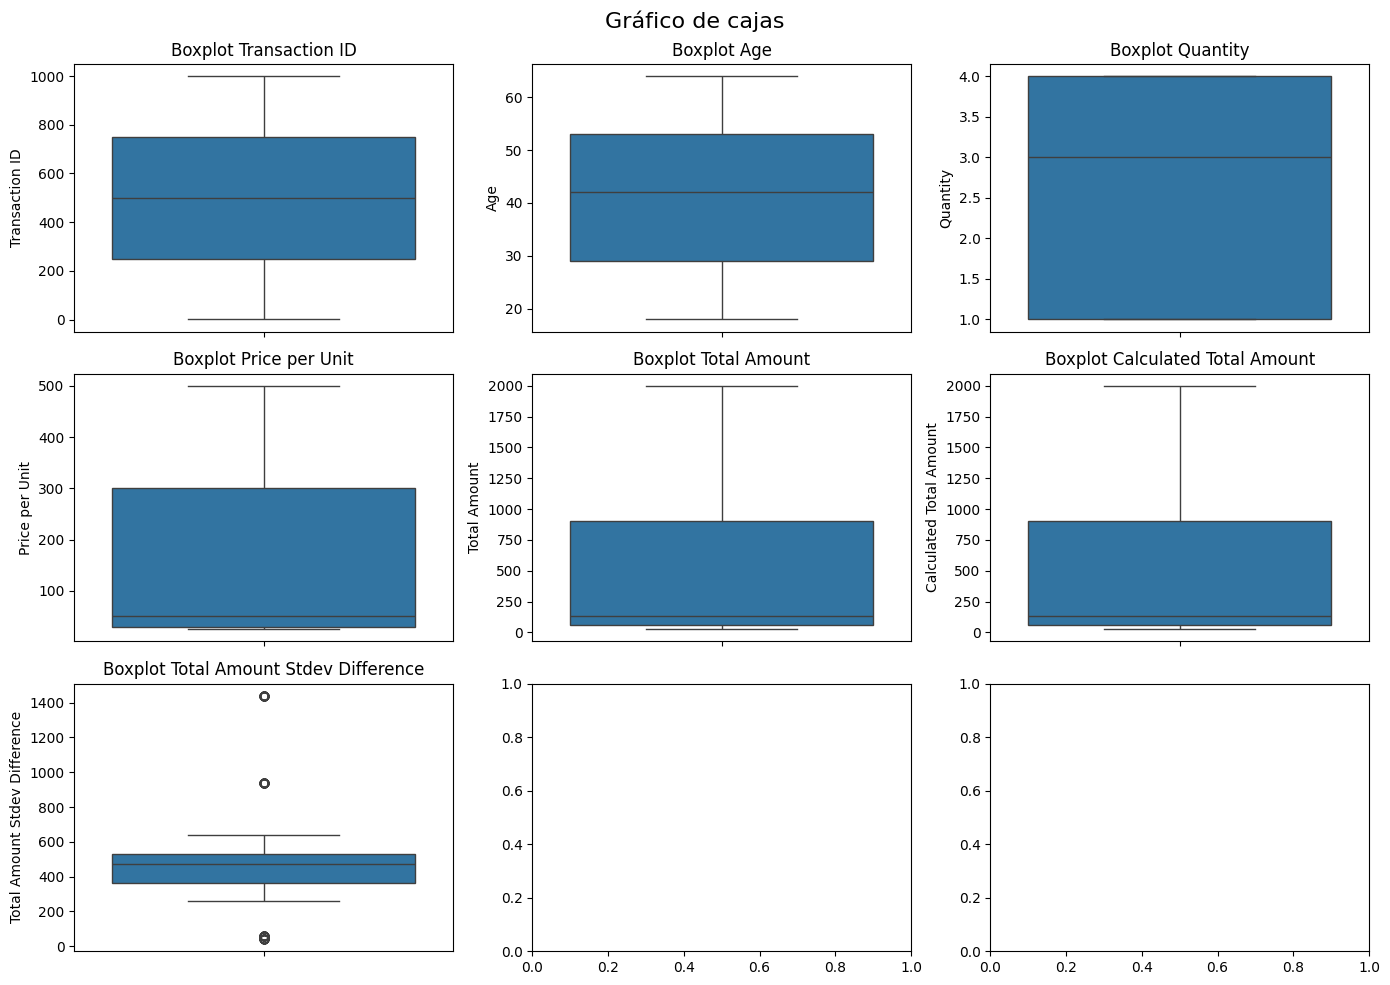

In [94]:
from utils import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df))

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [95]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,Calculated Total Amount,Total Amount Stdev Difference
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,456.000000,496.319048
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,25.000000,40.002368
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,60.000000,359.997632
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,135.000000,469.997632
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,900.000000,529.997632
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,2000.000000,1440.002368
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,559.997632,279.006281


In [96]:
from utils import get_descriptive_statistics
get_descriptive_statistics(df)

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Calculated Total Amount,Total Amount Stdev Difference
min,1.000000,18.000000,1.000000,25.000000,25.000000,25.000000,40.002368
max,1000.000000,64.000000,4.000000,500.000000,2000.000000,2000.000000,1440.002368
mean,500.500000,41.392000,2.514000,179.890000,456.000000,456.000000,496.319048
std,288.819436,13.681430,1.132734,189.681356,559.997632,559.997632,279.006281
median,500.500000,42.000000,3.000000,50.000000,135.000000,135.000000,469.997632
variation_coefficient,0.577062,0.330533,0.450571,1.054430,1.228065,1.228065,0.562151


No utilizaremos la columna Load ID ya que es solo un identificador

In [97]:
df.drop("Transaction ID", axis=1, inplace=True)
df.drop("Customer ID", axis=1, inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           1000 non-null   datetime64[ns]
 1   Gender                         1000 non-null   category      
 2   Age                            1000 non-null   int64         
 3   Product Category               1000 non-null   category      
 4   Quantity                       1000 non-null   int64         
 5   Price per Unit                 1000 non-null   int64         
 6   Total Amount                   1000 non-null   int64         
 7   Calculated Total Amount        1000 non-null   int64         
 8   Sale_Category                  1000 non-null   category      
 9   Age Classification             1000 non-null   category      
 10  Total Amount Stdev Difference  1000 non-null   float64       
dtypes: category(4), da

Ahora visualizaremos los histogramas de las diferentes columnas numéricas para entender mejor la distribución

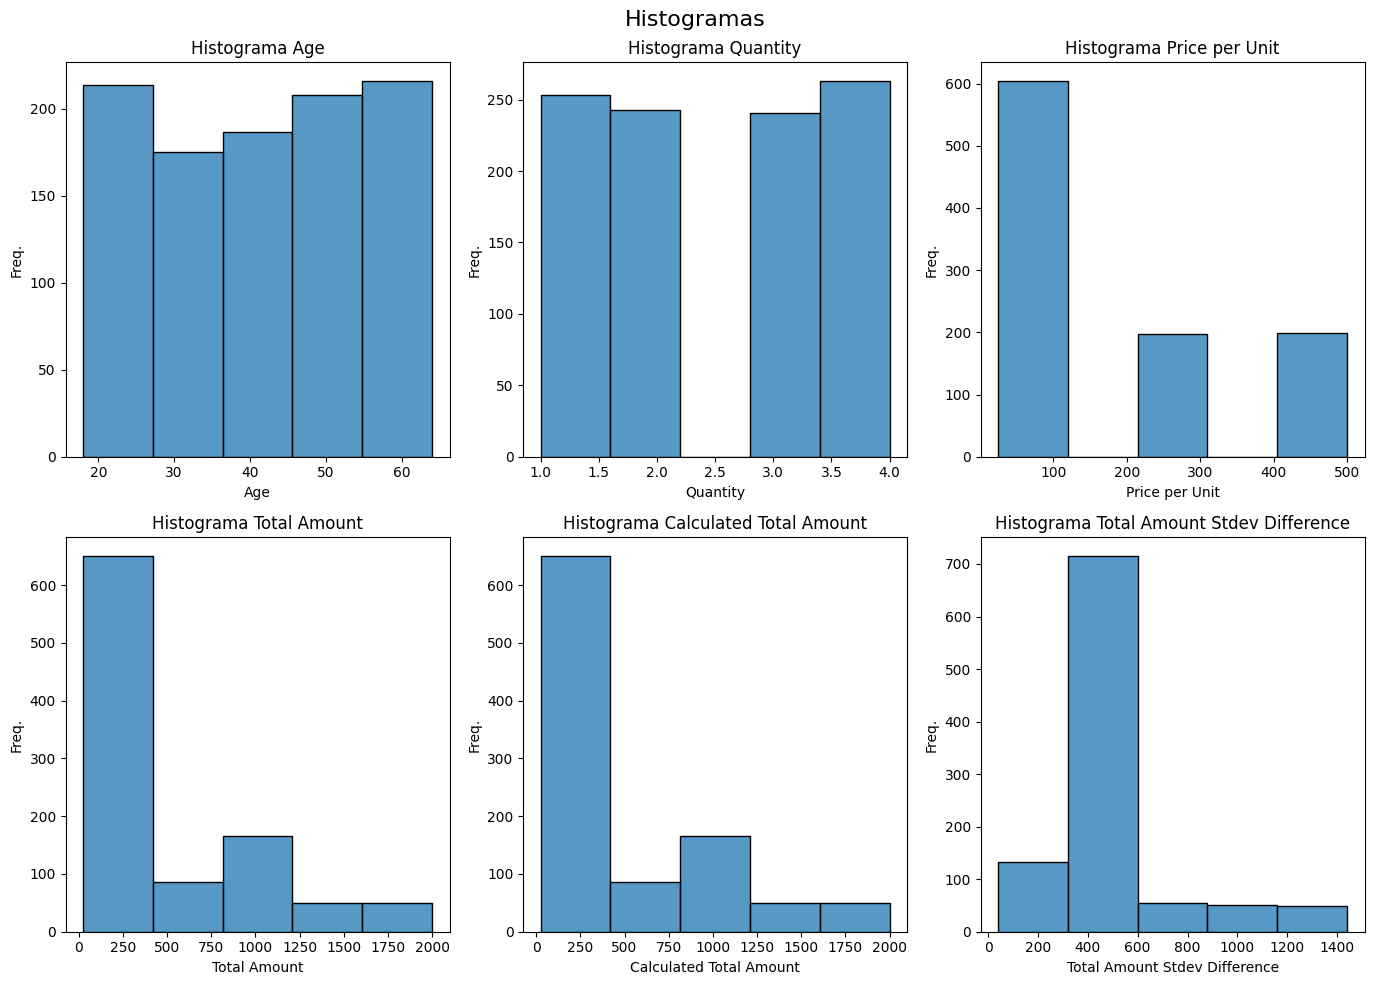

In [99]:
from utils import graph_histogram
graph_histogram(df, get_numeric_columns(df))

No se observa nada fuera de lo normal en las distribuciones

Se aprecia que la columna max.heart.rate posee una distribución normal, así como la columna edad, oldpeak, colesterol y ST.slope

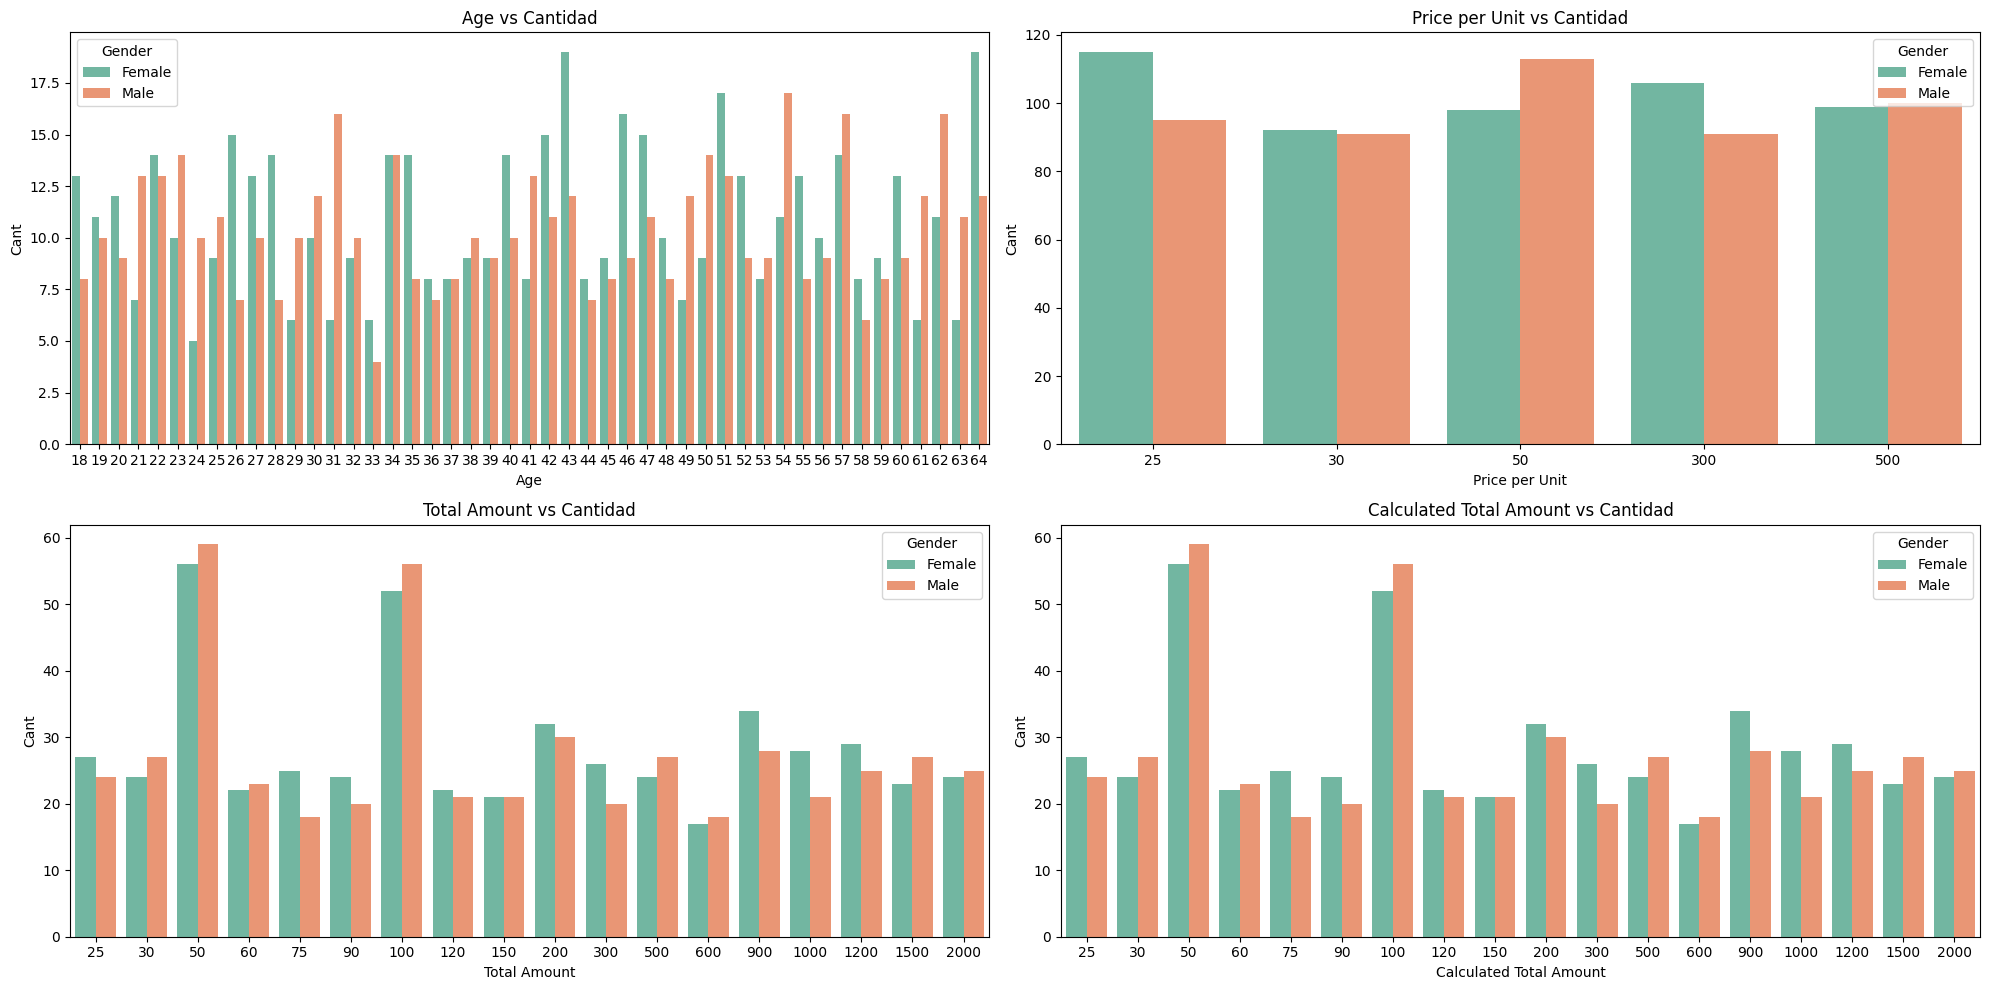

In [100]:
from utils import graph_barplot
graph_barplot(df, ["Age", "Price per Unit", "Total Amount", "Calculated Total Amount"],'Gender', num_columns=2, figsize=(20,10), title="Cantidad")

Observamos que tenemos datos desbalanceados para las columnas

Veremos las correlaciones entre las caracteristicas

In [101]:
from utils import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,Age,Quantity,Price per Unit,Total Amount,Calculated Total Amount,Total Amount Stdev Difference
Age,1.000000,-0.023737,-0.038423,-0.060568,-0.060568,-0.051358
Quantity,-0.023737,1.000000,0.017501,0.373707,0.373707,0.374290
Price per Unit,-0.038423,0.017501,1.000000,0.851925,0.851925,0.233934
Total Amount,-0.060568,0.373707,0.851925,1.000000,1.000000,0.619832
Calculated Total Amount,-0.060568,0.373707,0.851925,1.000000,1.000000,0.619832
Total Amount Stdev Difference,-0.051358,0.374290,0.233934,0.619832,0.619832,1.000000


Ahora graficamos el mapa de calor de las correlaciones

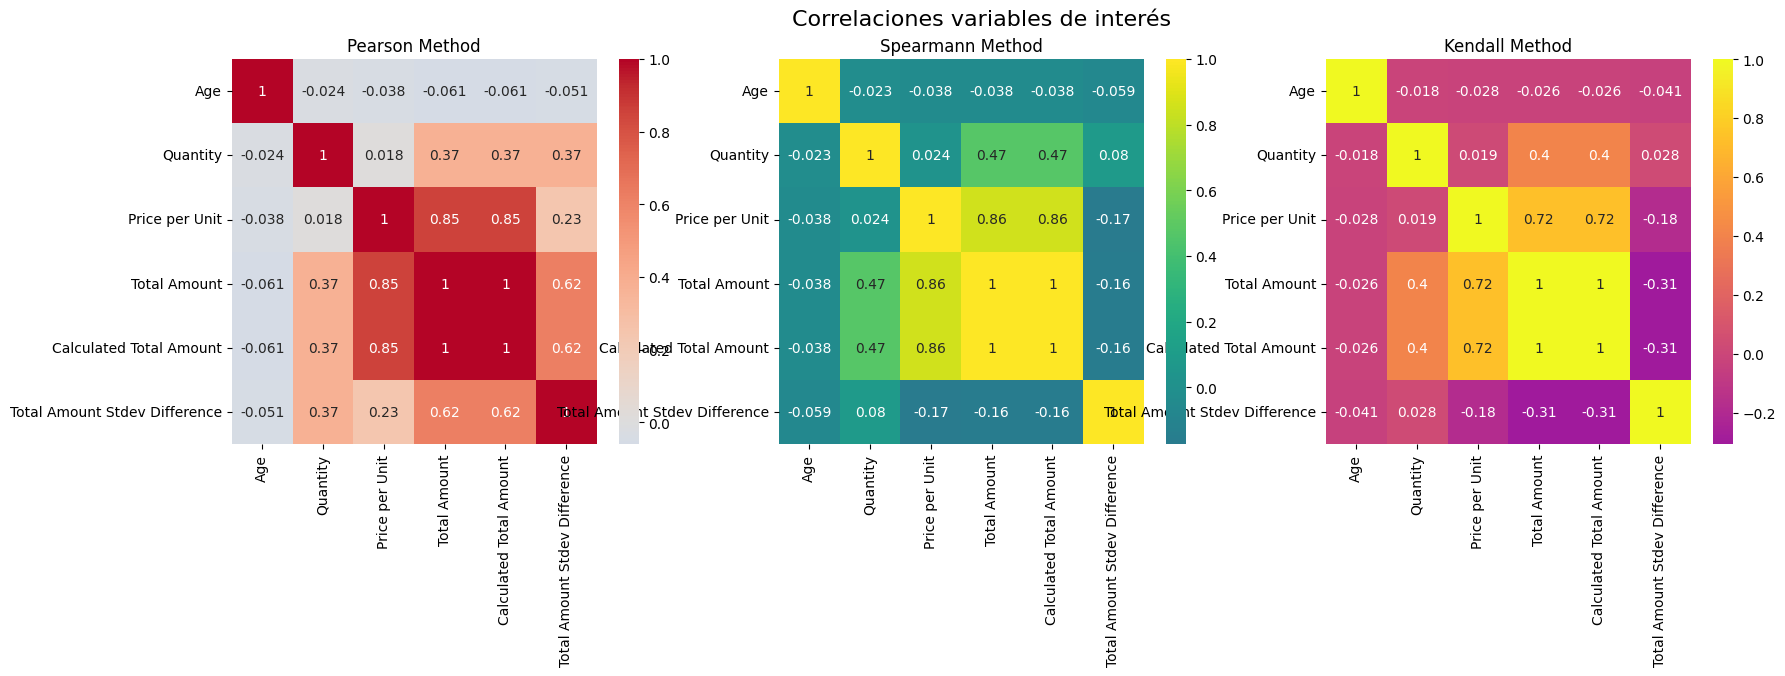

In [102]:
from utils import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,5))

Ahora observaremos la dispersión entre las variables

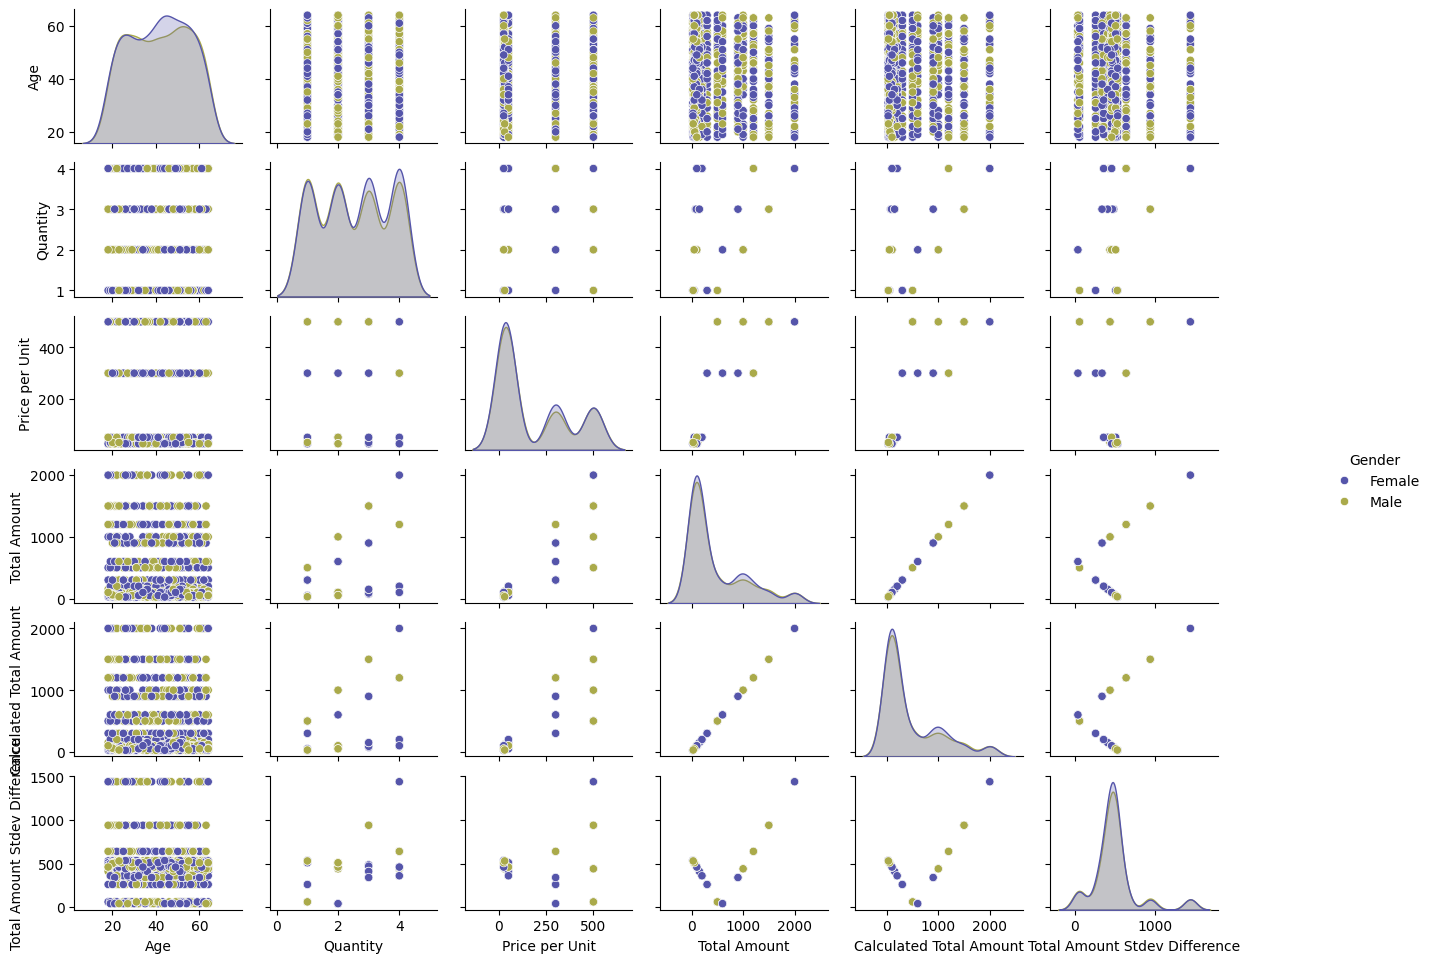

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = get_numeric_columns(df)
palette = sns.color_palette("gist_stern", n_colors=2)
g = sns.pairplot(df[[*numeric_columns] + ["Gender"]], hue='Gender', height=1.2, diag_kind = 'kde', palette=palette)
g.figure.set_size_inches(15, 10)
plt.show()

Iniciamos la preparación de datos

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           1000 non-null   datetime64[ns]
 1   Gender                         1000 non-null   category      
 2   Age                            1000 non-null   int64         
 3   Product Category               1000 non-null   category      
 4   Quantity                       1000 non-null   int64         
 5   Price per Unit                 1000 non-null   int64         
 6   Total Amount                   1000 non-null   int64         
 7   Calculated Total Amount        1000 non-null   int64         
 8   Sale_Category                  1000 non-null   category      
 9   Age Classification             1000 non-null   category      
 10  Total Amount Stdev Difference  1000 non-null   float64       
dtypes: category(4), da

In [105]:
from utils import get_numeric_columns, get_categoric_columns
numeric_columns = get_numeric_columns(df)
categoric_columns = get_categoric_columns(df)

print(numeric_columns)
print(categoric_columns)
predict_numeric = [
    'Price per Unit',
]

predict_categoric = [
    "Gender",
    "Age Classification",
    "Product Category",
]

output = "Total Amount"


X = df[[*predict_numeric] + [*predict_categoric]]
y = df[output]

['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Calculated Total Amount', 'Total Amount Stdev Difference']
['Gender', 'Product Category', 'Sale_Category', 'Age Classification']


Preparamos el set de entrenamiento

In [106]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

Dividimos el dataset en 70% para entrenamiento, 30% para pruebas

Preparamos el preprocesador y asignamos el Encoder OneHOT

In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, predict_numeric),
        ("cat", categorical_transformer, predict_categoric),
    ]
)

In [108]:
from sklearn.pipeline import Pipeline


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

### Random Forest

Generamos el modelo KNN

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


pipeline_rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            RandomForestRegressor(random_state=42),
            param_grid={ 
                'n_estimators': [1, 51],
                'max_depth': [1, 10],
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

pipeline_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=51; total time=   0.2s
[CV] END .......................max_depth=1, n_estimators=51; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=51; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=51; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=51; total time=   0.1s
[CV] END .......................max_depth=10, n_estimators=1; total time=   0.0s
[CV] END .......................max_depth=10, n_e

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price per Unit']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Age Classification',
                                                   'Product Category'])])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=RandomForestRegressor(random_state=42),
                              param_grid={'max_depth': [1, 10],
                                          'n_estimators': [1, 51]},
                              verbose=2))])

In [110]:
params_rf = pipeline_rf.steps[-1][1].best_params_

params_rf

{'max_depth': 10, 'n_estimators': 51}

### KNN

Creamos el modelo KNN

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV



pipeline_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            KNeighborsRegressor(),
            param_grid={
                "n_neighbors": list(range(1, 100)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

pipeline_knn.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price per Unit']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Age Classification',
                                                   'Product Category'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...]},
                              verbose=2))])

In [112]:
params_knn = pipeline_knn.steps[-1][1].best_params_

params_knn

{'n_neighbors': 15}

### Linear Regression

Generamos el modelo de regresion lineal

In [113]:
from sklearn.linear_model import LinearRegression


pipeline_lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression()),
    ]
)

pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price per Unit']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Age Classification',
                                                   'Product Category'])])),
                ('model', LinearRegression())])

### LGBM

Generamos el modelo LGBM

In [114]:
import lightgbm as lgb


# No se necesitan transformaciones de columnas categoricas ya que el modelo LGBM los maneja por defecto
preprocessor_lgb = ColumnTransformer(
    transformers=[
        ("num", scaler, predict_numeric),
    ]
)

pipeline_lgbm = Pipeline(
    steps=[
        ('preprocessor', preprocessor_lgb),
        ('model', lgb.LGBMRegressor(random_state=0)),
    ]
)

pipeline_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 1
[LightGBM] [Info] Start training from score 465.578571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price per Unit'])])),
                ('model', LGBMRegressor(random_state=0))])

## EValuamos los modelos

### Random Forest

Evaluamos el modelo Random Forest

In [115]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
y_pred_rf = pipeline_rf.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mse_rf = rmse_rf ** 2
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Error Cuadrático Medio: {mse_rf}')
print(f'Error Cuadrático Medio Raíz: {rmse_rf}')
print(f'R-cuadrado: {r2_rf}')
print(f'Error Absoluto Medio: {mae_rf}')

Error Cuadrático Medio: 91085.3846151297
Error Cuadrático Medio Raíz: 301.80355301939323
R-cuadrado: 0.6543772874221129
Error Absoluto Medio: 184.07396535426


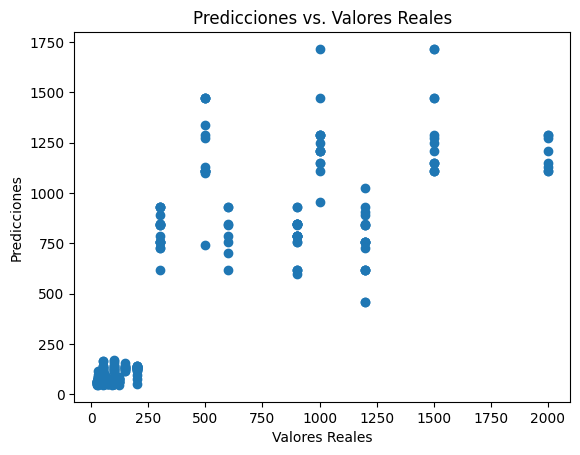

In [116]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

### KNN

Evaluamos el modelo KNN

In [117]:

y_pred_knn = pipeline_knn.predict(X_test)
rmse_knn = root_mean_squared_error(y_test, y_pred_knn)
mse_knn = rmse_knn ** 2
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f'Error Cuadrático Medio: {mse_knn}')
print(f'Error Cuadrático Medio Raíz: {rmse_knn}')
print(f'R-cuadrado: {r2_knn}')
print(f'Error Absoluto Medio: {mae_knn}')

Error Cuadrático Medio: 95841.62
Error Cuadrático Medio Raíz: 309.5829775682119
R-cuadrado: 0.6363297929494953
Error Absoluto Medio: 190.0


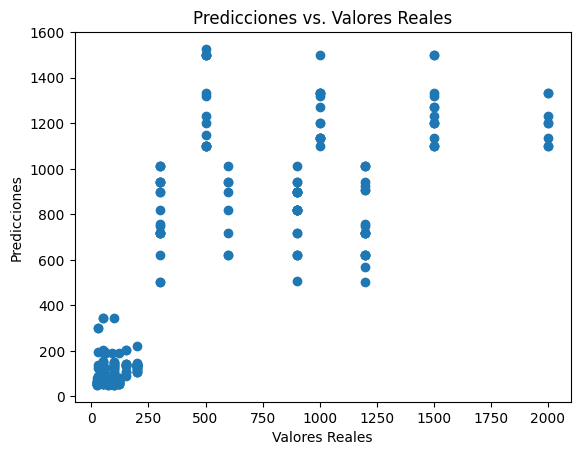

In [118]:
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

### Linear Regression

Evaluamos el modelo de Regresion Lineal

In [119]:
y_pred_lr = pipeline_lr.predict(X_test)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
mse_lr = rmse_lr ** 2
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'Error Cuadrático Medio: {mse_lr}')
print(f'Error Cuadrático Medio Raíz: {rmse_lr}')
print(f'R-cuadrado: {r2_lr}')
print(f'Error Absoluto Medio: {mae_lr}')

Error Cuadrático Medio: 81139.77
Error Cuadrático Medio Raíz: 284.85043443884723
R-cuadrado: 0.6921158369826144
Error Absoluto Medio: 179.64333333333335


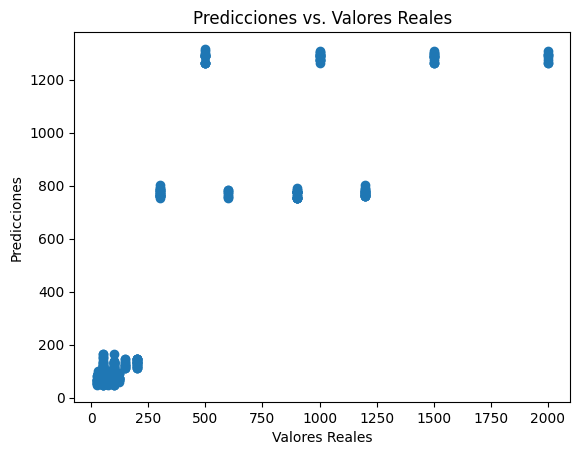

In [120]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

### LGBM

Evaluamos el modelo LGBM

In [121]:
y_pred_lgbm = pipeline_lgbm.predict(X_test)
rmse_lgbm = root_mean_squared_error(y_test, y_pred_lgbm)
mse_lgbm = rmse_lgbm ** 2
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

print(f'Error Cuadrático Medio: {mse_lgbm}')
print(f'Error Cuadrático Medio Raíz: {rmse_lgbm}')
print(f'R-cuadrado: {r2_lgbm}')
print(f'Error Absoluto Medio: {mae_lgbm}')

Error Cuadrático Medio: 80544.78034227462
Error Cuadrático Medio Raíz: 283.80412319463335
R-cuadrado: 0.6943735201480064
Error Absoluto Medio: 177.04317822026593


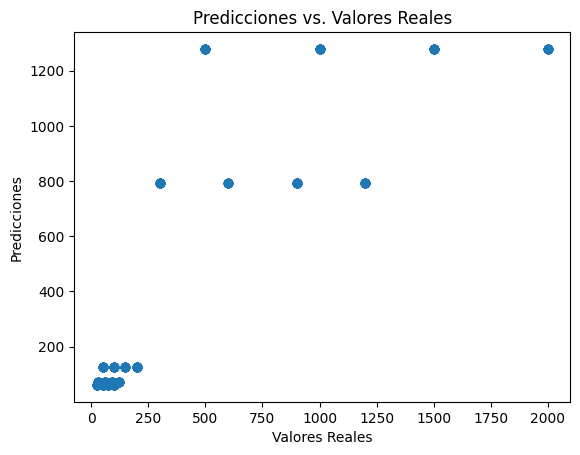

In [122]:
plt.scatter(y_test, y_pred_lgbm)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

## Analisis de Metricas

Generamos una  tabla para visualizar mejor

In [123]:
results = [
    ("Regresión Lineal", r2_lr, rmse_lr, mse_lr, mae_lr),
    ("KNN", r2_knn, rmse_knn, mse_knn, mae_knn),
    ("Random Forests", r2_knn, rmse_knn, mse_knn, mae_knn),
    ("LGBM", r2_lgbm, rmse_lgbm, mse_lgbm, mae_lgbm),
]

header = ["Método", "R2", "RMSE", "MSE", "MAE"]

df_results = pd.DataFrame(results, columns=header)

df_results

,Método,R2,RMSE,MSE,MAE
0,Regresión Lineal,0.692116,284.850434,81139.770000,179.643333
1,KNN,0.636330,309.582978,95841.620000,190.000000
2,Random Forests,0.636330,309.582978,95841.620000,190.000000
3,LGBM,0.694374,283.804123,80544.780342,177.043178


LGBM tiene el mejor valor de R² (0.6944), lo que significa que es el modelo que mejor explica la variabilidad de los datos.
También tiene el RMSE, MSE y MAE más bajos, lo que indica que tiene el menor error en comparación con los otros modelos.
Por lo tanto, LGBM parece ser el mejor modelo en este caso.

In [124]:
params_knn_str = ""

for clave, valor in params_knn.items():
    params_knn_str += f"{clave}={valor},"

params_knn_str = params_knn_str.rstrip(",")

params_rf_str = ""

for clave, valor in params_rf.items():
    params_rf_str += f"{clave}={valor},"

params_rf_str = params_rf_str.rstrip(",")

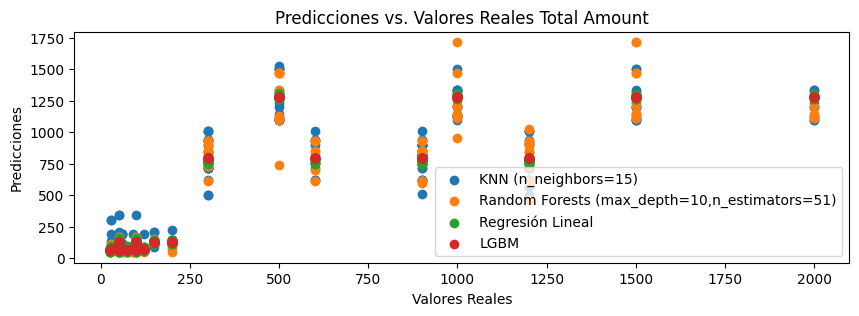

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(y_test, y_pred_knn, label=f"KNN ({params_knn_str})")
plt.scatter(y_test, y_pred_rf, label=f"Random Forests ({params_rf_str})")
plt.scatter(y_test, y_pred_lr, label="Regresión Lineal")
plt.scatter(y_test, y_pred_lgbm, label="LGBM")
plt.legend(loc='lower right')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales Total Amount')
plt.show()